In [1]:
# For numerical calculations
import numpy as np
import pandas as pd
import scipy as sp
from scipy.integrate import odeint
import scipy.optimize 
from scipy.optimize import leastsq
from math import exp
from collections import OrderedDict
import matplotlib.ticker as ticker
import matplotlib.patches as pch
from matplotlib.ticker import MaxNLocator

# Import plotting features
import matplotlib.pyplot as plt
import seaborn as sns


# Set plot style
sns.set(style="ticks")
#sns.set_palette("spectral")
sns.set_context("notebook")

# Magic command to plot inline
%matplotlib inline

#To graph in SVG (high def)
%config InlineBackend.figure_format="svg"

# Find home directory for repo
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

In [ ]:
#Read the file of the Raman spectra
#Replace with the path of your file
raman_all=pd.read_csv(f'{homedir}/raman_all.csv')
#Exclude data below 100 and above 200 cm-1
raman_all= raman_all[(raman_all.Raman_shift >= 100) & (raman_all.Raman_shift <= 2000)]
#Filter by locality
df_eocene = raman_all[(raman_all.Age == 'Eocene') & (raman_all.Orgs == 'Yes')]

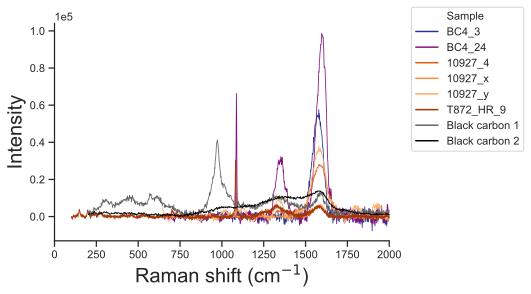

In [51]:
#Generate a plot for the Raman spectra of all data

#Filter by organics
df_orgcs = raman_all[(raman_all.Sample == 'T872_HR_9')
| (raman_all.Sample == 'BC4_24')
| (raman_all.Sample == '10927_4')
| (raman_all.Sample == '10927_x')
| (raman_all.Sample == '10927_y')
| (raman_all.Sample == 'BC4_3')
| (raman_all.Sample == 'Black carbon 1')
| (raman_all.Sample == 'Black carbon 2')
                    ]
#Define colot palette
my_palette = ['#253494','#810f7c','#e6550d','#fd8d3c','#fdae6b','#a63603','#636363','black']

#Create line plots 
ax = sns.lineplot(x="Raman_shift", y="Intensity", hue = "Sample", lw=0.8, data=df_orgcs, palette=my_palette)
#Remove top and right spines
sns.despine()
#Set axes limits and labels
ax.ticklabel_format(style='sci', scilimits=(0,0), axis='Y')
ax.set_xlim((0, 2000))
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=20)
#Make plot
plt.legend(bbox_to_anchor=(1.05, 1.1), loc=2, borderaxespad=0.5)
#Save figure
plt.savefig('raman_paper.pdf', bbox_inches='tight')